In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pwd

/kaggle/working


In [3]:
train_df = pd.read_csv('../input/feedback-prize-english-language-learning/train.csv')
submit = pd.read_csv('../input/feedback-prize-english-language-learning/sample_submission.csv')
test_df = pd.read_csv('../input/feedback-prize-english-language-learning/test.csv')


## EDA

In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
from nltk.tokenize import word_tokenize, sent_tokenize
import plotly.express as px
from plotly.offline import iplot
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from collections import defaultdict
from IPython.core.display import display, HTML
import string

from sklearn.feature_extraction.text import CountVectorizer
tqdm.pandas()

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [6]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_id    3 non-null      object
 1   full_text  3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [8]:
test_df.head()

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [9]:
train_df['full_text'][0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [10]:
len(train_df)

3911

In [11]:
score_cols = ['cohesion','syntax','vocabulary','phraseology','grammar','conventions']


In [12]:
train_df['total_score'] = train_df.loc[:,score_cols].sum(axis=1)

In [13]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,total_score
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,20.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,14.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,18.0
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,27.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,16.5


In [14]:
submit.head()

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,3.0,3.0,3.0,3.0,3.0,3.0
1,000BAD50D026,3.0,3.0,3.0,3.0,3.0,3.0
2,00367BB2546B,3.0,3.0,3.0,3.0,3.0,3.0


In [15]:
for i, col in enumerate(score_cols+['total_score']):
    print(i,col)

0 cohesion
1 syntax
2 vocabulary
3 phraseology
4 grammar
5 conventions
6 total_score


In [16]:
colors = px.colors.qualitative.Vivid

for i,col in enumerate(score_cols+['total_score']):
    fig = px.histogram(train_df,
                       x=col,
                       color_discrete_sequence=[colors[i]],
                       marginal='violin',
                       title = f"{col.replace('_',' ').title()} distribution"
                      )
    iplot(fig)

In [17]:
fig = px.imshow(train_df.corr(), text_auto=True)
iplot(fig)

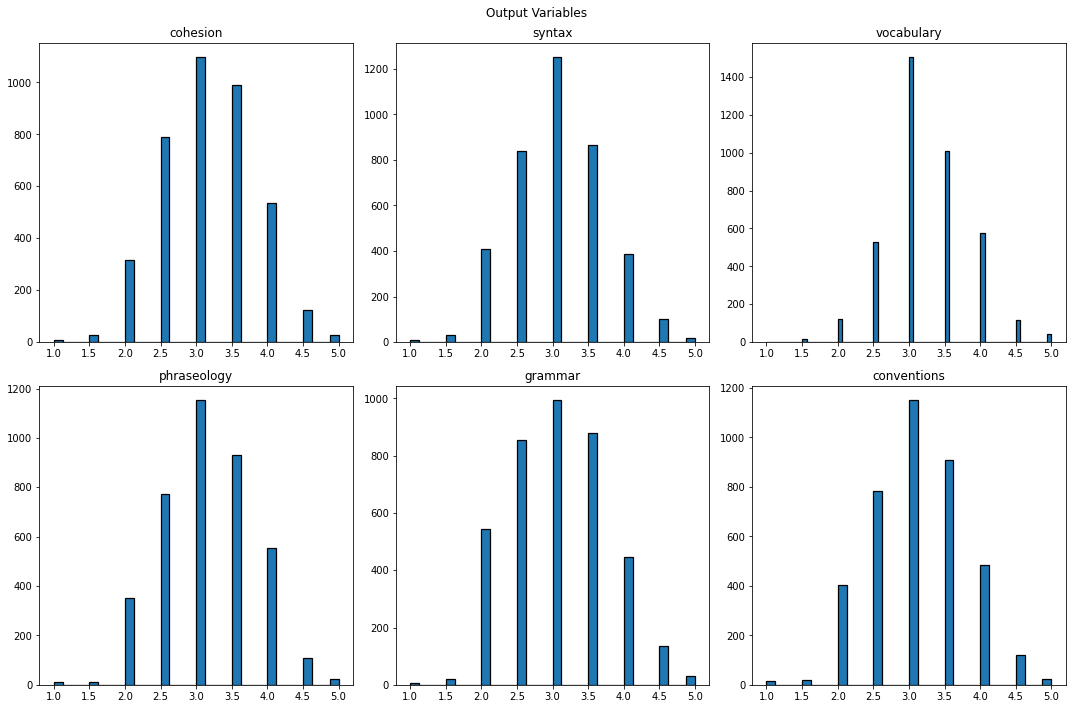

In [18]:
target1 = ['cohesion','syntax','vocabulary','phraseology','grammar','conventions']

fig, axes = plt.subplots(2, len(target1)//2,figsize=(15,10))

for i, target in enumerate(target1):
    ax = axes.flat[i]
    sns.histplot(x=target, data=train_df, linewidth=1.25, alpha=1, ax=ax, zorder=2)
    ax.set_title(target)
    ax.set(xlabel=None, ylabel=None)
    
fig.suptitle('Output Variables')
plt.tight_layout()
plt.show()

### Text Examples

In [19]:
def print_texts(df):
    inner_html = ""
    for idx, row in df.iterrows():
        inner_html += f"""
        <td style="vertical-align:top; border-right: 1px solid #7accd8">
        <h3 style="text-align:left">{row.text_id}</h3>
        <hr>
            <dl>
                <dt>Cohesion Syntax Vocabulary Phraseology Grammar Conventions</dt>
                <dd>choesion:{row.cohesion} syntax:{row.syntax} vocabulary:{row.vocabulary} phraseology:{row.phraseology} grammar:{row.grammar} conventions:{row.conventions}</dd>
            </dl>
            
            <hr>
            <p>
            {row.full_text[:500]}
            </p>
        </td>
        """
    display(HTML(f"""
    <table style="font-family: monospace;">
        <tr>
             {inner_html}
        </tr>
    </table>
    """))

In [20]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,total_score
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,20.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,14.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,18.0
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,27.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,16.5


In [21]:
lowest = train_df.sort_values('total_score').head()
print_texts(lowest)

767533E12569 Cohesion Syntax Vocabulary Phraseology Grammar Conventions choesion:1.0 syntax:1.0 vocabulary:1.0 phraseology:1.0 grammar:1.0 conventions:1.0 he is a good because they are the prescient and us. now the are more procession a other prescient and us. because and the more many education for student and school. the more school for one because he have a one women the have many education for a other because the good more the one is information for access because is not like the brazen giant of Greek fame with conquering one nation for is the imprison the eyes command the one book for people the us give more your lied your huddled Farmer with,48EA282A4EAF Cohesion Syntax Vocabulary Phraseology Grammar Conventions choesion:1.0 syntax:1.0 vocabulary:1.0 phraseology:1.0 grammar:1.0 conventions:1.0 some student offer distance learning as an option for student to attend classes from homr by wat of online pr video conferencing. i think student would benefit form being able to attend classesfrom home. you are authorized take the electronic version of this you will taking this promptsome student offer distance learning as an option for student to attend classes from homr by wat of online pr video conferencing. some student offer distance learning as an option for student to attend classes from,"DB2EA5C4828F Cohesion Syntax Vocabulary Phraseology Grammar Conventions choesion:1.0 syntax:1.0 vocabulary:1.5 phraseology:1.0 grammar:1.0 conventions:1.0 Technology is positive, because is the good possibility for people the accomplish method system, the effect by people is have playing blow up when is play have a ball is very good for your health. the many person said the woman is not good that sport but the woman is very good for all along time. reading the books is good for your skull you think by relation in your life. never put down handle by another person when you had acquire that examples when me litter girl get at in the unites states bu",F69C85F4C3CA Cohesion Syntax Vocabulary Phraseology Grammar Conventions choesion:1.0 syntax:1.0 vocabulary:1.5 phraseology:1.0 grammar:1.0 conventions:1.5 the memorable teacher ever had was a teacher in 10 word wild all students,"2716F5E20A4F Cohesion Syntax Vocabulary Phraseology Grammar Conventions choesion:1.5 syntax:1.0 vocabulary:1.5 phraseology:1.0 grammar:1.0 conventions:1.5 The students be required to take music ,drama ,or an art class. is important all the student to this to class because is a element important for all students., also is part the education and many people, I like for the music and art. other like drama . The people dont not like, but is necessary to take this class because is big formation very important and can't be graduated learning somethings . The class the music to help a relax , and class the drama is a part of fundamental , the class of a"


### Text Analysis

Number of Characters

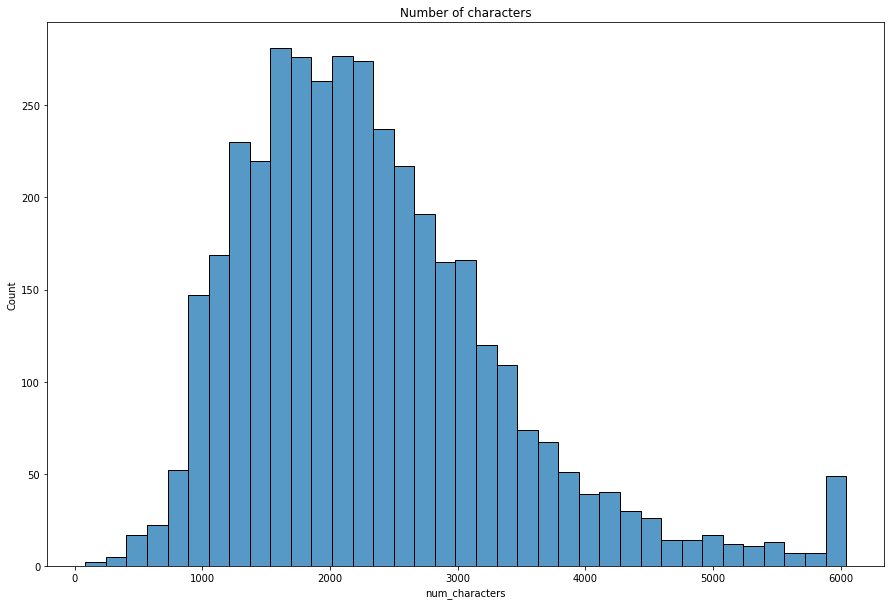

In [22]:
f = plt.figure(figsize=(15,10))

train_df['num_characters'] = train_df['full_text'].str.len()

sns.histplot(data=train_df, x = 'num_characters')

plt.title('Number of characters')
plt.show()

In [23]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,total_score,num_characters
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,20.0,1387
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,14.5,2635
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,18.0,1663
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,27.0,3973
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,16.5,1326


In [24]:
fig = px.histogram(train_df, x = train_df['full_text'].str.len(), marginal="box", 
                   title = "Number of Characters", color_discrete_sequence=["#FFA200"])
fig.update_layout(bargap=0.2)
fig.update_layout(template="plotly_dark", font=dict(family="PT Sans", size=18, color="#C4FEFF"))
fig.show()

Number of Words

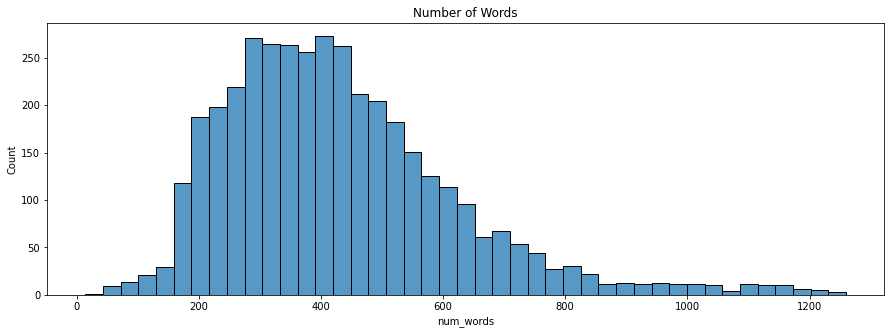

In [25]:
fig = plt.figure(figsize=(15, 5))
train_df['num_words'] = train_df['full_text'].apply(lambda x: len(x.split()))

sns.histplot(data=train_df, x="num_words")
plt.title("Number of Words")
plt.show()

In [26]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,total_score,num_characters,num_words
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,20.0,1387,261
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,14.5,2635,533
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,18.0,1663,320
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,27.0,3973,728
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,16.5,1326,234


In [27]:
fig = px.histogram(train_df, x = train_df['num_words'], marginal="box", 
                   title = "Number of Words", color_discrete_sequence=["#FFA200"])
fig.update_layout(bargap=0.2)
fig.update_layout(template="plotly_dark", font=dict(family="PT Sans", size=18, color="#C4FEFF"))
fig.show()

평균 단어 길이

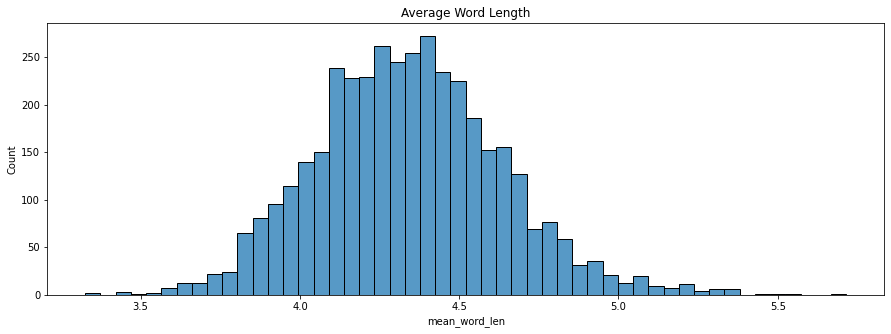

In [28]:
fig = plt.figure(figsize=(15, 5))
train_df['mean_word_len'] = train_df['full_text'].str.split().apply(lambda x : np.mean([len(i) for i in x]))
sns.histplot(data=train_df, x="mean_word_len")
plt.title("Average Word Length")
plt.show()

In [29]:
fig = px.histogram(train_df, x=train_df['mean_word_len'], marginal="box", 
                   title = "Average Word Length", color_discrete_sequence=["#FFA200"])
fig.update_layout(bargap=0.2)
fig.update_layout(template="plotly_dark", font=dict(family="PT Sans", size=18, color="#C4FEFF"))
fig.show()

### Word Cloud

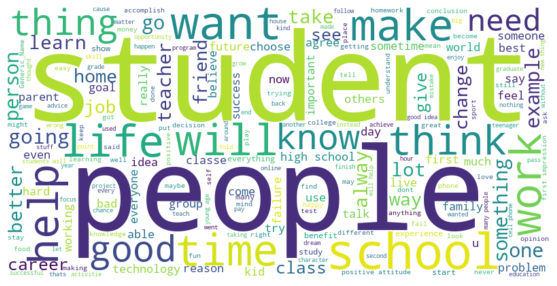

In [30]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(''.join(train_df.full_text))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### N-gram

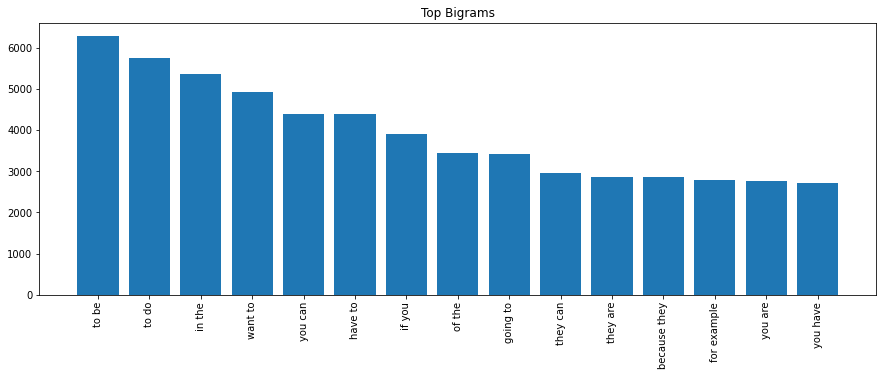

In [31]:
fig = plt.figure(figsize=(15, 5))

def get_top_bigrams(corpus, n):
    vectorizer = CountVectorizer(ngram_range=(n,n)).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq

top_bigrams = get_top_bigrams(train_df['full_text'], n=2)[:15]
x, y = map(list, zip(*top_bigrams))
plt.bar(x, y)
plt.title('Top Bigrams')
plt.xticks(rotation=90)
plt.show()

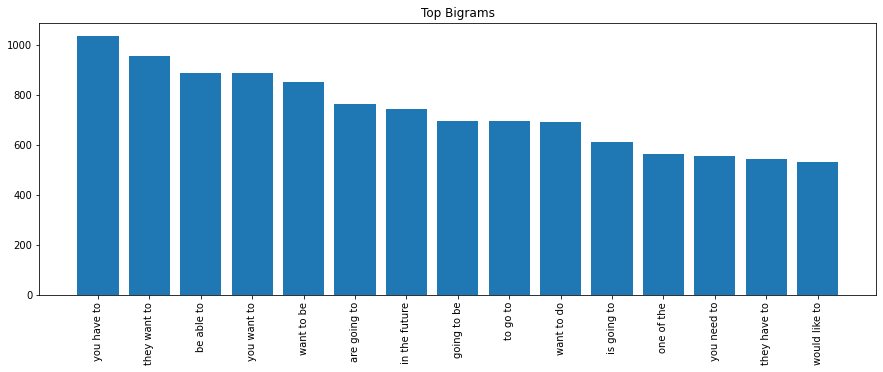

In [32]:
fig = plt.figure(figsize=(15, 5))

def get_top_bigrams(corpus, n):
    vectorizer = CountVectorizer(ngram_range=(n,n)).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq

top_bigrams = get_top_bigrams(train_df['full_text'], n=3)[:15]
x, y = map(list, zip(*top_bigrams))
plt.bar(x, y)
plt.title('Top Bigrams')
plt.xticks(rotation=90)
plt.show()

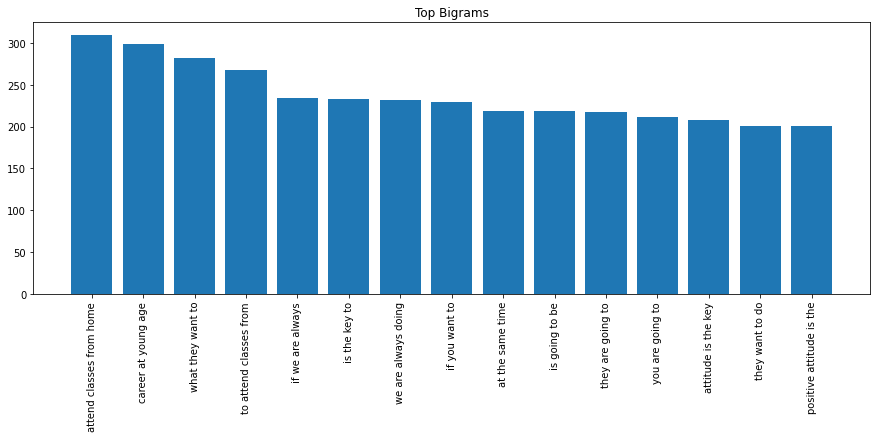

In [33]:
fig = plt.figure(figsize=(15, 5))

def get_top_bigrams(corpus, n):
    vectorizer = CountVectorizer(ngram_range=(n,n)).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq

top_bigrams = get_top_bigrams(train_df['full_text'], n=4)[:15]
x, y = map(list, zip(*top_bigrams))
plt.bar(x, y)
plt.title('Top Bigrams')
plt.xticks(rotation=90)
plt.show()

## Model(version1)
- Referecnes : https://www.kaggle.com/code/baokar7/feedback-prize-bert-beginner-with-pytorch

In [34]:
!pip3 install transformers

Huggingface 사용법

In [35]:
# from transformers import TFAutoModel, AutoTokenizer
# model = TFAutoModel.from_pretrained("<model-name>")
# tokenizer = AutoTokenizer.from_pretrained('<model-name>')

# 이런식으로~~

모듈 정의

In [36]:
import numpy as np
import pandas as pd

import os
from transformers import AutoModel
from transformers import AutoTokenizer

import torch
import torch.nn as nn


from tqdm.notebook import tqdm
import transformers

from transformers import get_linear_schedule_with_warmup, AdamW, get_cosine_schedule_with_warmup
from transformers import get_cosine_with_hard_restarts_schedule_with_warmup
from transformers import get_polynomial_decay_schedule_with_warmup
from sklearn.metrics import mean_squared_error
import torch.nn.functional as F
from transformers import BertTokenizer
# os.system('pip install iterative-stratification==0.1.7')

데이터 불러오기

In [37]:
train_df = pd.read_csv('../input/feedback-prize-english-language-learning/train.csv')
submit = pd.read_csv('../input/feedback-prize-english-language-learning/sample_submission.csv')
test_df = pd.read_csv('../input/feedback-prize-english-language-learning/test.csv')

train1_df = pd.read_csv('../input/multiple-language-backtranslation-dataset/backtranslate_df.csv')


Back Translation(Data Augmentation)

In [38]:
#googletrans import


# !pip uninstall googletrans
# !pip install googletrans==3.1.0a0

In [39]:
# from googletrans import Translator


# def BackTranslation(text, original_lang, via_lang):
#     translator = Translator()
#     max_trans_len = 5000
#     if len(text) >= max_trans_len:
#         text = ''.join(text[:max_trans_len])
#     via_text = translator.translate(text, dest=via_lang).text
#     if len(via_text) >= max_trans_len:
#         via_text = ''.join(via_text[:max_trans_len])
#     return translator.translate(via_text, dest=original_lang).text

In [40]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [41]:
lang = 'fr'
train_df['full_text'] = train1_df[f'{lang}_backtrans_text']
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think students would benefit from learning a...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,"When a problem is a change, you must let it do...",2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,Dear director\n\nIf you change the school poli...,3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best moment in life is when you become you...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,A little act of kindness can have an impact on...,2.5,3.0,3.0,3.0,2.5,2.5


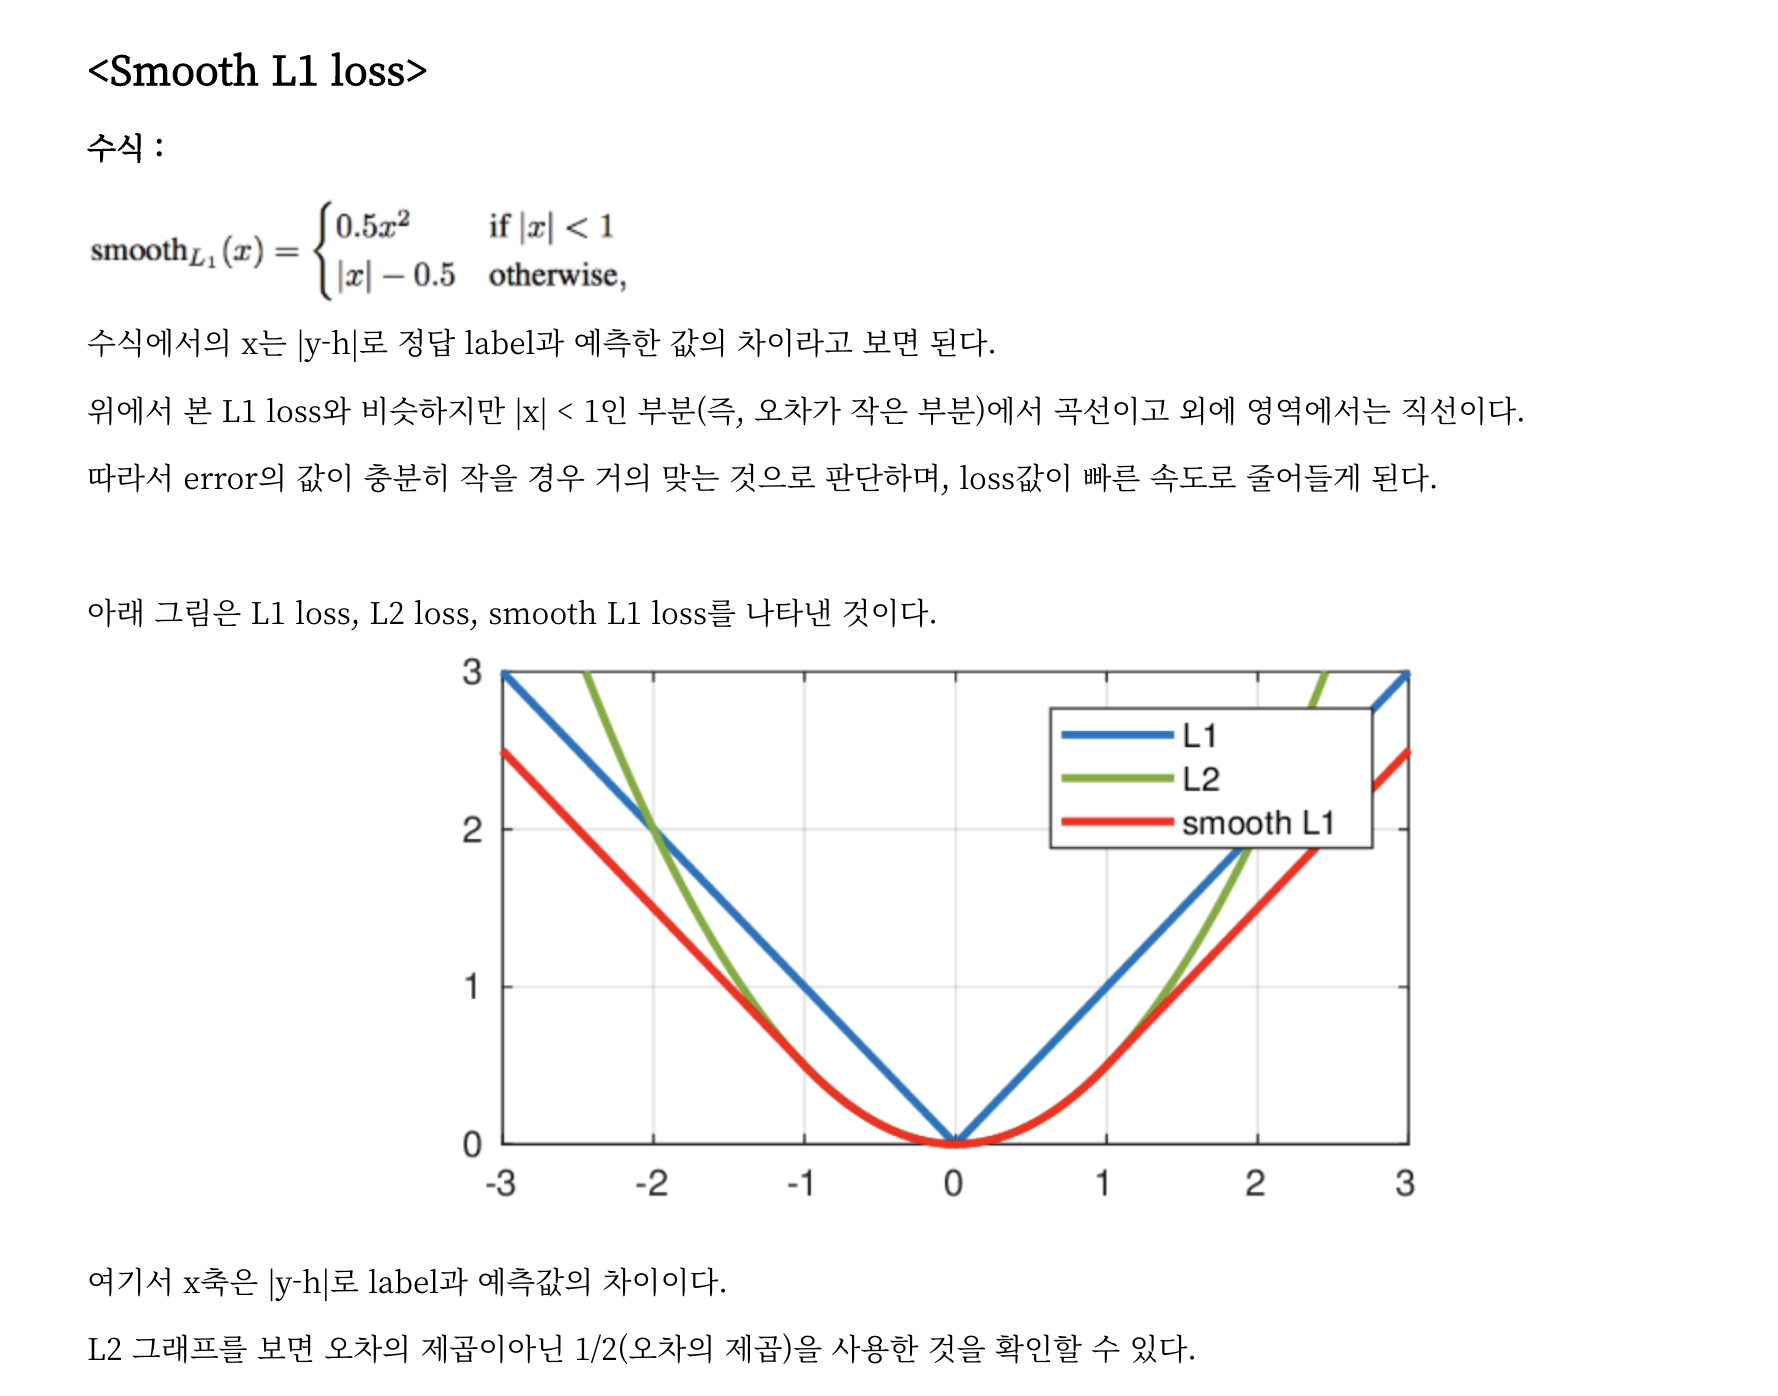


- References : https://ganghee-lee.tistory.com/33

In [42]:
# Merging Train and Test Data
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['text_id'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (3914, 7)


In [43]:
import string
import nltk
from nltk.corpus import stopwords
PUNCT_TO_REMOVE = string.punctuation
STOPWORDS = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

# Create an instance of a PorterStemmer object
lemmatizer = WordNetLemmatizer()
s = PorterStemmer()
def preprocess(text) : 
    #Using cased model so not lowering 
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+','', text)
    text = re.sub(r'@[0-9a-zA-Z]*\W+',' ' , text)
    #text = re.sub(r'\.','[SEP]' , text)
    
    #text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\#', ' ', text)
    text = re.sub(r'\'', ' ', text)
    

    list_text = text.split()
    ############# STOP WORDS #############
    a = []                    
    for token in list_text:     
        if token not in STOPWORDS:
            a.append(token)
    ############# STOP WORDS #############
    ############ stemming#################
    b = []
    for i in list_text:
        b.append(s.stem(i))
    ############stemming ##############
        
#     text = ' '.join(list_text[:512])
    text = ' '.join(b[:512])
    return text



In [44]:
all_data['full_text'] = all_data['full_text'].apply(lambda text : preprocess(text))
# all_data.shape
all_data.head()

,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,i think student would benefit from learn at ho...,3.5,3.5,3.0,3.0,4.0,3.0
1,"when a problem is a change, you must let it do...",2.5,2.5,3.0,2.0,2.0,2.5
2,dear director if you chang the school polici t...,3.0,3.5,3.0,3.0,3.0,2.5
3,the best moment in life is when you becom your...,4.5,4.5,4.5,4.5,4.0,5.0
4,a littl act of kind can have an impact on othe...,2.5,3.0,3.0,3.0,2.5,2.5


In [45]:
all_data['full_text'][0]

'i think student would benefit from learn at home becaus they will not have to chang and get up earli in the morn to shower and style. take onli lesson help them becaus in your house, they will be more careful. they will be comfort at home. the most difficult part of the school is to prepare. you wake up, go brush your teeth and go to your cupboard and look at your rags. after think that you have chosen an outfit, you will look in the mirror and you will not like it, either you look and see a stain. so you will have to change. with onlin courses, you can wear anyth and stay at home and you will not need to emphas what to wear. most student usual take shower befor school. they take it befor sleep or when they wake up. some student do both to feel good. thi make them miss the bu and the effect on cours time becaus they arriv late at school. when you have onlin courses, you will not need to miss lesson becaus you can instal everyth and take a shower and when you go out, you are readi to g

In [46]:
train_df = all_data[:ntrain].copy()
test_df = all_data[ntrain:]

train_df.shape , test_df.shape

((3911, 7), (3, 7))

In [47]:
# Custom error function MCRMSE : column wise root mean squared eoor
def MCRMSE(y_true, y_hat):
    colwise_mse = tf.reduce_mean(tf.square(y_true - y_hat), axis=1)
    return tf.reduce_mean(tf.sqrt(colwise_mse), axis=-1, keepdims=True)

In [48]:
# class RMSELoss(nn.Module):
#     def __init__(self, eps=1e-6):
#         super().__init__()
#         self.mse = nn.MSELoss()
#         self.eps = eps

#     def forward(self, yhat, y):
#         loss = torch.sqrt(self.mse(yhat, y) + self.eps)
#         return loss
        
# class MCRMSELoss(nn.Module):
#     def __init__(self, num_scored=3):
#         super().__init__()
#         self.rmse = RMSELoss()
#         self.num_scored = num_scored

#     def forward(self, yhat, y):
#         score = 0
#         for i in range(self.num_scored):
#             score += self.rmse(yhat[:, :, i], y[:, :, i]) / self.num_scored

#         return score

In [49]:
!pwd

/kaggle/working


In [50]:
config = {
    'model': 'bert-base-uncased',
    'max_length': 512,
    'train_batch_size': 8,
    'valid_batch_size': 8,
    'epochs':5,
    'loss_fn': nn.SmoothL1Loss(), # or MCRMSELoss()
    # 'loss_fn' : MCRMSELoss(),
    'device': 'cuda' if torch.cuda.is_available() else 'cpu',
    'target_classes': ['cohesion','syntax','vocabulary','phraseology','grammar','conventions']
}

tokenizer 

In [51]:
# print(config['model'])

In [65]:
from transformers import AutoTokenizer, AutoModelForMaskedLM,RobertaTokenizer,TFRobertaModel

MODEL_DIR = "../input/huggingface-bert/"
# MODEL_DIR1 = "../input/fb3models/"
# MODEL_DIR2 = '../input/roberta-base/'
tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR + "bert-base-uncased")
# tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR1 + "microsoft-deberta-v3-base")
model = transformers.AutoModel.from_pretrained(MODEL_DIR + "bert-base-uncased")
# model = transformers.AutoModel.from_pretrained(MODEL_DIR1 + "microsoft-deberta-v3-base")
# tokenizer = transformers.AutoTokenizer.from_pretrained(config['model'])
# tokenizer = RobertaTokenizer.from_pretrained(MODEL_DIR2)
# model = TFRobertaModel.from_pretrained(MODEL_DIR2)


############################### BERT-LARGE ###########################################
# tokenizer = BertTokenizer.from_pretrained('../input/huggingface-bert/bert-large-cased')
# model = BertModel.from_pretrained('../input/huggingface-bert/bert-large-cased/bert-large-cased')
#######################################################################################

Some weights of the model checkpoint at ../input/huggingface-bert/bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [66]:
train_df.head()

,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,i think student would benefit from learn at ho...,3.5,3.5,3.0,3.0,4.0,3.0
1,"when a problem is a change, you must let it do...",2.5,2.5,3.0,2.0,2.0,2.5
2,dear director if you chang the school polici t...,3.0,3.5,3.0,3.0,3.0,2.5
3,the best moment in life is when you becom your...,4.5,4.5,4.5,4.5,4.0,5.0
4,a littl act of kind can have an impact on othe...,2.5,3.0,3.0,3.0,2.5,2.5


In [67]:
class FeedbackDataset():

    def __init__(self,dataset):

        self.data = dataset
        self.classes = ['cohesion','syntax','vocabulary','phraseology','grammar','conventions']
        self.max_len = config['max_length']
        self.tokenizer = tokenizer

    # 총 데이터의 개수를 리턴
    def __len__(self):
        return len(self.data)
    # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
    def __getitem__(self,idx):
        full_txt = str(self.data['full_text'][idx])

        token_dict = tokenizer(full_txt,None,add_special_tokens=True,max_length=self.max_len,truncation=True,padding='max_length')

        ids = token_dict['input_ids']
        token_type_ids = token_dict['token_type_ids']
        attention_mask = token_dict['attention_mask']

        label = self.data.loc[idx,self.classes].to_list()

        return { 'ids' : torch.tensor(ids,dtype=torch.long),
                 'token_type_ids' : torch.tensor(token_type_ids,dtype=torch.long),
                 'mask' : torch.tensor(attention_mask,dtype=torch.long),
                 'target' : torch.tensor(label,dtype=torch.float)
        }


In [68]:
class Bert_model(nn.Module):
    
    def __init__(self, config, num_labels=6):
        super(Bert_model,self).__init__()
        self.bert_model = transformers.AutoModel.from_pretrained(MODEL_DIR + "bert-base-uncased")
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(self.bert_model.config.hidden_size, 768)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(768,256)
        self.dropou = nn.Dropout(0.2)
        self.relu1 = nn.ReLU()
        self.fc3 = nn.Linear(256, num_labels)
    
    def forward(self, ids, token_type_ids, mask):
        _, outputs = self.bert_model(ids, token_type_ids, mask, return_dict=False)
        # print(outputs.shape)
        outputs = self.dropout(outputs)
        outputs = self.relu(self.fc1(outputs))
        outputs = self.fc2(outputs)
        outputs = self.relu1(self.dropou(outputs))
        outputs = self.fc3(outputs)
        return outputs

In [69]:
# class Bert_large_model(nn.Module):
    
#     def __init__(self, config, num_labels=6):
#         super(Bert_model,self).__init__()
#         self.bert_model = BertModel.from_pretrained('../input/huggingface-bert/bert-large-cased/bert-large-cased')
#         self.dropout = nn.Dropout(0.2)
#         self.fc1 = nn.Linear(self.bert_model.config.hidden_size, 1024)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(1024,256)
#         self.dropou = nn.Dropout(0.2)
#         self.relu1 = nn.ReLU()
#         self.fc3 = nn.Linear(256, num_labels)
    
#     def forward(self, ids, token_type_ids, mask):
#         _, outputs = self.bert_model(ids, token_type_ids, mask, return_dict=False)
#         # print(outputs.shape)
#         outputs = self.dropout(outputs)
#         outputs = self.relu(self.fc1(outputs))
#         outputs = self.fc2(outputs)
#         outputs = self.relu1(self.dropou(outputs))
#         outputs = self.fc3(outputs)
#         return outputs

In [70]:
import torch
torch.cuda.empty_cache()

In [71]:
# class RoBert_model(nn.Module):
    
#     def __init__(self, config, num_labels=6):
#         super(RoBert_model,self).__init__()
#         self.bert_model = TFRobertaModel.from_pretrained(MODEL_DIR2)
#         self.dropout = nn.Dropout(0.4)
#         self.fc1 = nn.Linear(self.bert_model.config.hidden_size, 768)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(768,256)
#         self.dropou = nn.Dropout(0.4)
#         self.relu1 = nn.ReLU()
#         self.fc3 = nn.Linear(256, num_labels)
    
#     def forward(self, ids, token_type_ids, mask):
#         _, outputs = self.bert_model(ids, token_type_ids, mask, return_dict=False)
#         # print(outputs.shape)
#         outputs = self.dropout(outputs)
#         outputs = self.relu(self.fc1(outputs))
#         outputs = self.fc2(outputs)
#         outputs = self.relu1(self.dropou(outputs))
#         outputs = self.fc3(outputs)
#         return outputs

In [72]:
from tqdm.notebook import tqdm

In [73]:
def train(dataloader, model, device, optimizer):
    
    model.train()
    loss_sum = 0.
    total = 0
    iterator = tqdm(enumerate(dataloader), total=len(dataloader))
    for index, data in iterator:
        ids = data['ids']
        token_type_ids = data['token_type_ids']
        mask = data['mask']
        targets = data['target']
        # print("ids:", ids.shape)
        # print("token_type_ids:",token_type_ids.shape)
        # print("mask:", mask.shape)
        # print("target:",targets.shape)
        
        ids = ids.squeeze().to(device, dtype=torch.long)
        token_type_ids = token_type_ids.squeeze().to(device, dtype=torch.long)
        mask = mask.squeeze().to(device, dtype=torch.long)
        targets = targets.to(device, dtype=torch.float)
        
        optimizer.zero_grad()
        outputs = model(ids, token_type_ids, mask)
        
#         print(outputs.size())
#         print(targets.size())
        
        loss = config['loss_fn'](outputs, targets)
        loss_sum += loss.item()
        
        loss.backward()
        optimizer.step()
        total += targets.shape[0]
        
        del ids, token_type_ids, mask, targets, outputs, loss
        
    result = loss_sum / total
    
    return result

In [74]:
def validate(dataloader, model, device):
    
    model.eval()
    loss_sum = 0.
    total = 0
    iterator = tqdm(enumerate(dataloader), total=len(dataloader))
    for index, data in iterator:
        ids = data['ids']
        token_type_ids = data['token_type_ids']
        mask = data['mask']
        targets = data['target']
        
        ids = ids.squeeze().to(device, dtype=torch.long)
        token_type_ids = token_type_ids.squeeze().to(device, dtype=torch.long)
        mask = mask.squeeze().to(device, dtype=torch.long)
        targets = targets.to(device, dtype=torch.float)
        
        with torch.no_grad():
            outputs = model(ids, token_type_ids, mask)
        
        loss = config['loss_fn'](outputs, targets)
        loss_sum += loss.item()
        total += targets.shape[0]
        
        del ids, token_type_ids, mask, targets, outputs, loss
    result = loss_sum / total

    return result

In [75]:
from torch.utils.data import DataLoader

In [76]:
def get_grad_norm(parameters, norm_type=2):
    parameters = list(filter(lambda p: p.grad is not None, parameters))

    total_norm = 0

    try:
        for p in parameters:
            total_norm += (p.grad.data**norm_type).sum()
        total_norm = total_norm ** (1. / norm_type)
    except Exception as e:
        print(e)

    return total_norm


def get_parameter_norm(parameters, norm_type=2):
    total_norm = 0

    try:
        for p in parameters:
            total_norm += (p.data**norm_type).sum()
        total_norm = total_norm ** (1. / norm_type)
    except Exception as e:
        print(e)

    return total_norm

In [77]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
from sklearn.model_selection import train_test_split

device = config['device']

loss_train = []
loss_validate = []

train_data, valid_data = train_test_split(train_df, test_size=0.2, random_state=42, shuffle=True)
train_data, valid_data = train_data.reset_index(), valid_data.reset_index()

model = Bert_model(config)
model.to(device)
train_dataset = FeedbackDataset(train_data)
train_dataloader = DataLoader(dataset=train_dataset, batch_size=config['train_batch_size'])
valid_dataset = FeedbackDataset(valid_data)
valid_dataloader = DataLoader(dataset=valid_dataset, batch_size=config['valid_batch_size'])
param_optimizer = list(model.named_parameters())
no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]
optimizer_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0},
    ]
optimizer = AdamW(optimizer_parameters, lr=0.00001)

# print('dldllddldldll',model.parameters())  
 
for epoch in range(config['epochs']):
    print("#################### EPOCH: %d ####################" % (epoch+1))
    train_loss = train(train_dataloader, model, device, optimizer)
    valid_loss = validate(valid_dataloader, model, device)
    loss_train.append(train_loss)
    loss_validate.append(valid_loss)
    print("Training Loss: %f, Validation Loss: %f" % (train_loss, valid_loss))
    print('grad_norm',get_grad_norm(model.parameters()))
    print('para_norm',get_parameter_norm(model.parameters()))
    print('')

In [ ]:
loss_df = pd.DataFrame({
    'epoch': list(range(1, config['epochs'] + 1)),
    'train_loss': loss_train,
    'validation_loss': loss_validate
})
loss_df

In [ ]:
class test_dataset:
    
    def __init__(self, dataset):
        self.config = config
        self.tokenizer = tokenizer
        self.max_len = config['max_length']
        self.txt = dataset['full_text'].values
    
    def __len__(self):
        return len(self.txt)
    
    def __getitem__(self, item):
        
        txt = str(self.txt[item])
        tokenizer_dict = self.tokenizer(
            txt,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_len,
            padding='max_length'
        )
        ids = tokenizer_dict['input_ids']
        token_type_ids = tokenizer_dict['token_type_ids']
        attention_mask = tokenizer_dict['attention_mask']
        
        return {'ids': torch.tensor(ids, dtype=torch.long),
                'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
                'mask': torch.tensor(attention_mask, dtype=torch.long)
               }

In [ ]:
def test(dataloader,model,device):

    pred = []
    model.eval()
    iterator = tqdm(enumerate(dataloader),total=len(dataloader))
    
    for idx,data in iterator:

        ids = data['ids']
        token_type_ids = data['token_type_ids']
        mask = data['mask']

        ids = ids.to(device,dtype=torch.long)
        token_type_ids = token_type_ids.to(device,dtype=torch.long)
        mask = mask.to(device,dtype=torch.long)

        with torch.no_grad():
            output = model(ids,token_type_ids,mask)
        
        pred.append(output.detach().cpu())

    preds = np.concatenate(pred)
    return preds 

In [ ]:
test_dataset = test_dataset(test_df)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=config['valid_batch_size'])
preds = test(test_dataloader, model, device)

In [ ]:
print(preds)

In [ ]:
submit[config['target_classes']] = preds

In [ ]:
print(submit)

In [ ]:
submit.to_csv('submission.csv',index=False)

In [ ]:
submit.head()